In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls "/content/gdrive/My Drive/Omdena Pandemic/dataset"

 bank-lending-rate-forecast.csv         ilostat_1.csv
 consumer_price_index.csv	        ilostat_2020_min_wages.csv
'COVID19EconomicImpact 10Mar2020.csv'   ilostat_2.csv
 CPI_monthly.csv		        ilostat_sex_rural.csv
 discouraged_job_seekers_monthly.csv    ilostat_tatest_area.csv
 excahnge_rates.csv		        minimum_wages_te.csv
 exchange.csv			       'minimum_wages_trading economics.gsheet'
 iHDI_cleaned.csv		        OXFORD_policies_updated.csv


In [0]:
bank_lend_drive = "/content/gdrive/My Drive/Omdena Pandemic/dataset/bank-lending-rate-forecast.csv"

In [0]:
policies_drive = "/content/gdrive/My Drive/Omdena Pandemic/dataset/OXFORD_policies_updated.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
data= pd.read_csv(bank_lend_drive)

In [0]:
data.head()

,Country,Last,timestamp,Q2/20,Q3/20,Q4/20,Q1/21
0,Albania,4.39,Dec/19,4.39,4.39,4.39,4.39
1,Angola,19.76,Nov/19,19.76,19.76,19.76,19.76
2,Australia,7.92,Feb/20,7.92,7.92,7.92,7.92
3,Austria,1.71,Feb/20,1.67,1.67,1.67,1.67
4,Bahamas,10.43,Jan/20,9.93,9.93,9.93,9.93


In [0]:
data.shape

(56, 7)

In [0]:
data.dtypes

Country       object
Last         float64
timestamp     object
Q2/20        float64
Q3/20        float64
Q4/20        float64
Q1/21        float64
dtype: object

In [0]:
data.isnull().sum()

Country      0
Last         0
timestamp    0
Q2/20        0
Q3/20        0
Q4/20        0
Q1/21        0
dtype: int64

In [0]:
data[['lending_rate_month','lending_rate_year']] = data['timestamp'].str.split('/',expand=True)

In [0]:
data.head()

,Country,Last,timestamp,Q2/20,Q3/20,Q4/20,Q1/21,lending_rate_month,lending_rate_year
0,Albania,4.39,Dec/19,4.39,4.39,4.39,4.39,Dec,19
1,Angola,19.76,Nov/19,19.76,19.76,19.76,19.76,Nov,19
2,Australia,7.92,Feb/20,7.92,7.92,7.92,7.92,Feb,20
3,Austria,1.71,Feb/20,1.67,1.67,1.67,1.67,Feb,20
4,Bahamas,10.43,Jan/20,9.93,9.93,9.93,9.93,Jan,20


In [0]:
data = data.drop(['timestamp','Q3/20','Q4/20','Q1/21'],axis=1)

In [0]:
data.rename(columns={'Last':'Lending Rate'},inplace=True)

In [0]:
data.lending_rate_year = data.lending_rate_year.apply(lambda x: '2019' if '19' in x else '2020')

In [0]:
data.head()

,Country,Lending Rate,Q2/20,lending_rate_month,lending_rate_year
0,Albania,4.39,4.39,Dec,2019
1,Angola,19.76,19.76,Nov,2019
2,Australia,7.92,7.92,Feb,2020
3,Austria,1.71,1.67,Feb,2020
4,Bahamas,10.43,9.93,Jan,2020


In [0]:
data.groupby(['lending_rate_year','lending_rate_month']).count()

Country  Lending Rate  Q2/20
lending_rate_year lending_rate_month                              
2019              Dec                       5             5      5
                  Nov                       5             5      5
                  Sep                       3             3      3
2020              Apr                       5             5      5
                  Feb                      27            27     27
                  Jan                       3             3      3
                  Mar                       8             8      8

In [0]:
data['Country'].value_counts()

Slovakia          1
Ireland           1
Israel            1
Singapore         1
Kuwait            1
Japan             1
Netherlands       1
Bahrain           1
Russia            1
Belgium           1
Kenya             1
Australia         1
Tanzania          1
Ukraine           1
Latvia            1
Chile             1
Sri Lanka         1
Germany           1
Taiwan            1
Liberia           1
Euro Area         1
Luxembourg        1
Angola            1
Spain             1
Egypt             1
Zimbabwe          1
New Zealand       1
Philippines       1
South Korea       1
United States     1
Estonia           1
India             1
Croatia           1
France            1
United Kingdom    1
Slovenia          1
South Africa      1
Italy             1
Bahamas           1
Albania           1
Canada            1
Austria           1
Botswana          1
Brazil            1
Mauritius         1
Bolivia           1
Thailand          1
Greece            1
Malta             1
Hong Kong         1


In [0]:
#slicing data for Australia, Denmark, India, Japan, South Korea, USA
data_coun= data[(data['Country'] == 'India') | (data['Country'] =='Australia') | (data['Country'] == 'Japan') | (data['Country'] == 'Sount Korea') 
 | (data['Country'] == 'United States')].reset_index()

In [0]:
data_coun.head()  #data_coun is the dataframe to use.

,index,Country,Lending Rate,Q2/20,lending_rate_month,lending_rate_year
0,2,Australia,7.92,7.92,Feb,2020
1,23,India,9.40,9.25,Apr,2020
2,27,Japan,0.95,0.95,Feb,2020
3,54,United States,3.81,3.81,Mar,2020


In [0]:
data_1 = pd.read_csv(policies_drive)

In [0]:
data_1.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [0]:
data_1.dtypes

CountryName                               object
CountryCode                               object
Date                                       int64
C1_School closing                        float64
C1_Flag                                  float64
C2_Workplace closing                     float64
C2_Flag                                  float64
C3_Cancel public events                  float64
C3_Flag                                  float64
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C5_Close public transport                float64
C5_Flag                                  float64
C6_Stay at home requirements             float64
C6_Flag                                  float64
C7_Restrictions on internal movement     float64
C7_Flag                                  float64
C8_International travel controls         float64
E1_Income support                        float64
E1_Flag                                  float64
E2_Debt/contract rel

In [0]:
#filling the na with 0
data_1.isnull().sum()

CountryName                                  0
CountryCode                                  0
Date                                         0
C1_School closing                          560
C1_Flag                                  12839
C2_Workplace closing                       697
C2_Flag                                  14372
C3_Cancel public events                    697
C3_Flag                                  12761
C4_Restrictions on gatherings              727
C4_Flag                                  14187
C5_Close public transport                  747
C5_Flag                                  16413
C6_Stay at home requirements               701
C6_Flag                                  15230
C7_Restrictions on internal movement       737
C7_Flag                                  14759
C8_International travel controls           727
E1_Income support                          844
E1_Flag                                  18274
E2_Debt/contract relief                    863
E3_Fiscal mea

In [0]:
data_1 = data_1.fillna(0)

In [0]:
data_1.isnull().sum()

CountryName                              0
CountryCode                              0
Date                                     0
C1_School closing                        0
C1_Flag                                  0
C2_Workplace closing                     0
C2_Flag                                  0
C3_Cancel public events                  0
C3_Flag                                  0
C4_Restrictions on gatherings            0
C4_Flag                                  0
C5_Close public transport                0
C5_Flag                                  0
C6_Stay at home requirements             0
C6_Flag                                  0
C7_Restrictions on internal movement     0
C7_Flag                                  0
C8_International travel controls         0
E1_Income support                        0
E1_Flag                                  0
E2_Debt/contract relief                  0
E3_Fiscal measures                       0
E4_International support                 0
H1_Public i

In [0]:
data_1['CountryName'].value_counts()

United Arab Emirates    140
El Salvador             140
Bhutan                  140
Kyrgyz Republic         140
India                   140
                       ... 
Palestine               138
Mexico                  138
Cote d'Ivoire           138
Brunei                  138
Solomon Islands         136
Name: CountryName, Length: 167, dtype: int64

In [0]:
data_1= data_1.rename(columns={'CountryName':'Country'})

In [0]:
data_1['Date'] = data_1['Date'].astype(str)

In [0]:
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%Y%m%d')

In [0]:
#slicing data for Australia, Denmark, India, Japan, South Korea, USA
data_countries= data_1[(data_1['Country'] == 'India') | (data_1['Country'] =='Australia') | (data_1['Country'] == 'Japan') | (data_1['Country'] == 'Sount Korea') 
 | (data_1['Country'] == 'United States')].reset_index()

In [0]:
data_countries['Year'] = data_countries['Date'].dt.year

In [0]:
data_countries['Month'] = data_countries['Date'].dt.month

In [0]:
data_countries.head(10)

,index,Country,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,Year,Month
0,970,Australia,AUS,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
1,971,Australia,AUS,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
2,972,Australia,AUS,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
3,973,Australia,AUS,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
4,974,Australia,AUS,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
5,975,Australia,AUS,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
6,976,Australia,AUS,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
7,977,Australia,AUS,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
8,978,Australia,AUS,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1
9,979,Australia,AUS,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,1


In [0]:
data_countries = data_countries.drop(['index','CountryCode','Date'],axis=1)

In [0]:
data_countries.dtypes

Country                                   object
C1_School closing                        float64
C1_Flag                                  float64
C2_Workplace closing                     float64
C2_Flag                                  float64
C3_Cancel public events                  float64
C3_Flag                                  float64
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C5_Close public transport                float64
C5_Flag                                  float64
C6_Stay at home requirements             float64
C6_Flag                                  float64
C7_Restrictions on internal movement     float64
C7_Flag                                  float64
C8_International travel controls         float64
E1_Income support                        float64
E1_Flag                                  float64
E2_Debt/contract relief                  float64
E3_Fiscal measures                       float64
E4_International sup

In [0]:
data_worplace_closing = data_countries.loc[:, ["Country", "C2_Workplace closing","Year","Month"]]

In [0]:
#Policy: C2_Workplace closing, 	C6_Stay at home requirements
data_workplace_closing = data_worplace_closing[data_worplace_closing['C2_Workplace closing'] >0.0]

In [0]:
data_workplace_closing = data_workplace_closing.reset_index()

In [0]:
data_workplace_closing.head()

,index,Country,C2_Workplace closing,Year,Month
0,82,Australia,2.0,2020,3
1,83,Australia,2.0,2020,3
2,84,Australia,2.0,2020,3
3,85,Australia,2.0,2020,3
4,86,Australia,2.0,2020,3


In [0]:
data_workplace_closing = data_workplace_closing.drop(['index'],axis=1)

In [0]:
data_workplace_closing.head(20)

,Country,C2_Workplace closing,Year,Month
0,Australia,2.0,2020,3
1,Australia,2.0,2020,3
2,Australia,2.0,2020,3
3,Australia,2.0,2020,3
4,Australia,2.0,2020,3
5,Australia,2.0,2020,3
6,Australia,2.0,2020,3
7,Australia,2.0,2020,3
8,Australia,2.0,2020,3
9,Australia,2.0,2020,4


In [0]:
data_workplace_closing.shape

(262, 4)

In [0]:
data_workplace_closing.dtypes

Country                  object
C2_Workplace closing    float64
Year                      int64
Month                     int64
dtype: object

In [0]:
data_coun.dtypes

index                   int64
Country                object
Lending Rate          float64
Q2/20                 float64
lending_rate_month     object
lending_rate_year      object
dtype: object

In [0]:
data_workplace_closing.groupby(['Month','Country'])['C2_Workplace closing'].count()

Month  Country      
2      Japan             5
3      Australia         9
       India            16
       Japan            31
       United States    13
4      Australia        30
       India            30
       Japan            30
       United States    30
5      Australia        15
       India            19
       Japan            19
       United States    15
Name: C2_Workplace closing, dtype: int64

In [0]:
data_workplace_closing = data_workplace_closing.drop_duplicates(subset=['Month','Country'])

In [0]:
data_coun.head()

,index,Country,Lending Rate,Q2/20,lending_rate_month,lending_rate_year
0,2,Australia,7.92,7.92,Feb,2020
1,23,India,9.40,9.25,Apr,2020
2,27,Japan,0.95,0.95,Feb,2020
3,54,United States,3.81,3.81,Mar,2020


In [0]:
data_coun = data_coun.drop(['index'],axis=1)

In [0]:
data_coun = data_coun.drop(['Q2/20'],axis=1)

In [0]:
#converting all months to numbers to merge with policies.
def convert(x):
  val = 0
  if(x['lending_rate_month'] == 'Jan'):
    val =1
  elif(x['lending_rate_month'] == 'Feb'):
    val =2
  elif(x['lending_rate_month'] == 'Mar'):
    val=3
  elif(x['lending_rate_month'] == 'Apr'):
    val=4
  elif(x['lending_rate_month'] == 'May'):
    val=5
  elif(x['lending_rate_month'] == 'Jun'):
    val=6
  elif(x['lending_rate_month'] == 'Jul'):
    val=7
  elif(x['lending_rate_month'] == 'Aug'):
    val=8
  elif(x['lending_rate_month'] == 'Sep'):
    val=9
  elif(x['lending_rate_month'] == 'Oct'):
    val=10
  elif(x['lending_rate_month'] == 'Nov'):
    val=11
  else:
    val = 12
  return val

In [0]:
data_coun['lending_rate_month'] = data_coun.apply(convert,axis=1)

In [0]:
data_coun.head()

,Country,Lending Rate,lending_rate_month,lending_rate_year
0,Australia,7.92,2,2020
1,India,9.40,4,2020
2,Japan,0.95,2,2020
3,United States,3.81,3,2020


In [0]:
data_coun['lending_rate_year'] = data_coun['lending_rate_year'].astype(int)

In [0]:
data_coun.dtypes

Country                object
Lending Rate          float64
lending_rate_month      int64
lending_rate_year       int64
dtype: object

In [0]:
data_coun.rename(columns={'lending_rate_month':'Month', 'lending_rate_year':'Year'},inplace=True)

In [0]:
data_coun.head(10)

,Country,Lending Rate,Month,Year
0,Australia,7.92,2,2020
1,India,9.40,4,2020
2,Japan,0.95,2,2020
3,United States,3.81,3,2020


In [0]:
data_workplace_closing.head(10)

,Country,C2_Workplace closing,Year,Month
0,Australia,2.0,2020,3
9,Australia,2.0,2020,4
39,Australia,2.0,2020,5
54,India,1.0,2020,3
70,India,3.0,2020,4
100,India,2.0,2020,5
119,Japan,1.0,2020,2
124,Japan,1.0,2020,3
155,Japan,1.0,2020,4
185,Japan,1.0,2020,5


In [0]:
cols=['Country','Year','Month']

In [0]:
merge_policies_banklend = pd.merge(data_workplace_closing,data_coun,on=cols)

In [0]:
merge_policies_banklend.head(10)

,Country,C2_Workplace closing,Year,Month,Lending Rate
0,India,3.0,2020,4,9.40
1,Japan,1.0,2020,2,0.95
2,United States,3.0,2020,3,3.81


In [0]:
data_coun.head(10)

,Country,Lending Rate,Month,Year
0,Australia,7.92,2,2020
1,India,9.40,4,2020
2,Japan,0.95,2,2020
3,United States,3.81,3,2020


In [0]:
merge_policies_banklend.groupby(['Month','Country']).count()

,,C2_Workplace closing,Year,Lending Rate
Month,Country,,,
2,Japan,1,1,1
3,United States,1,1,1
4,India,1,1,1


In [0]:
#merge_policies_banklend.drop_duplicates(subset=['Month','Country'])

In [0]:
merge_policies_banklend.head(10)

,Country,C2_Workplace closing,Year,Month,Lending Rate
0,India,3.0,2020,4,9.40
1,Japan,1.0,2020,2,0.95
2,United States,3.0,2020,3,3.81


In [0]:
corr_data = merge_policies_banklend.corr()

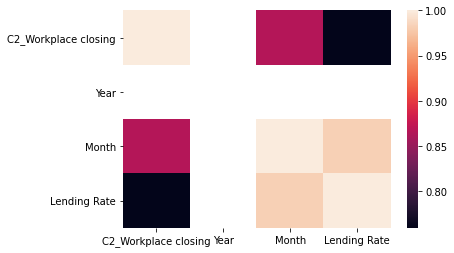

In [0]:
sns.heatmap(corr_data)

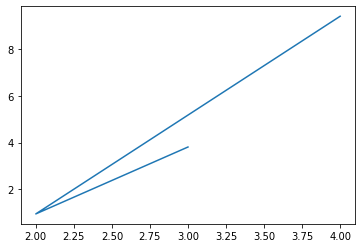

In [0]:
plt.plot(merge_policies_banklend['Month'],merge_policies_banklend['Lending Rate'])

([<matplotlib.axis.XTick at 0x7f845c0c48d0>,
 <a list of 3 Text major ticklabel objects>)

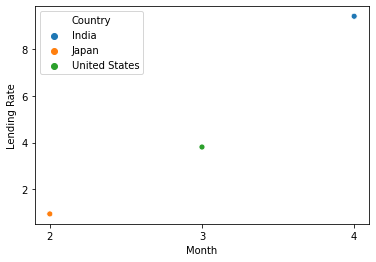

In [0]:
sns.scatterplot(x="Month", y="Lending Rate",
                  hue="Country",
                  data=merge_policies_banklend)
plt.xticks([2.0,3.0,4.0])

([<matplotlib.axis.YTick at 0x7f845c04f390>,
 <a list of 2 Text major ticklabel objects>)

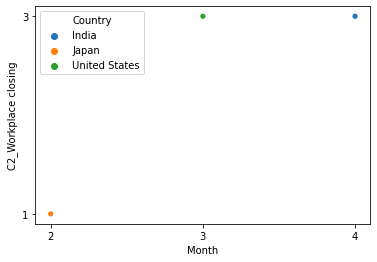

In [0]:
sns.scatterplot(x="Month", y="C2_Workplace closing",
                   hue="Country",
                  data=merge_policies_banklend)
plt.xticks([2.0,3.0,4.0])
plt.yticks([1.0,3.0])

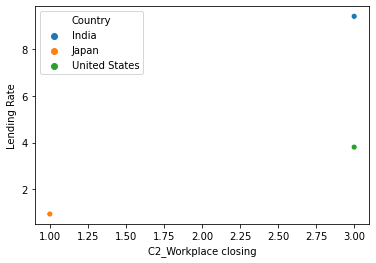

In [0]:
sns.scatterplot(x="C2_Workplace closing", y="Lending Rate",
                   hue="Country",
                  data=merge_policies_banklend)